# Applied Machine learning in Python

Most of the computer science problems are solved by writing a series of instruction, but not at all the problems can be solved using this approach, for example a speech to text conversion system, there are millions to billions of words and it is a diffcult task words and more over pronouncation,accent etc. differs, so for these type of problems the solution is to train the computer with an algorithm to understand some words to that it can learn by itself.This concept is called machine learning

Key types of machine learning problem
* Supervised : Larn to predict target values from labelled data
    * Classification (target values are discrete classes)
    * Regression (target values are continuous values)
* Unsupervised : Find structure in unlabelled data
    * Clustering : Find groups of similar instances in data
    * Outlier Detection : Finding usual patterns

In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table(r'C:\Users\kkv1\Desktop\Python\DS\Applied ML in python\Dataset\fruit_data_with_colors.txt')

In [24]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [25]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In any machine learning task to train the computer we have split the data into two parts
* Training set
* Test set
Training set is used to train the model and test set is used to evaluate the learned model.

For creating a model all the features from the dataset might not be required so for that reason we take only those features which are revelant to the model we are creating.

### Creating train_test_split

In [26]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [28]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

The first step in machine learning is to evaluating the dataset, for this any visualization method can be used or one can simply scrol through the data.The reason for evaluating the data is as follows,
* Type of cleaning or prep processing that is required
* Distribution of values for each feature


<IPython.core.display.Javascript object>


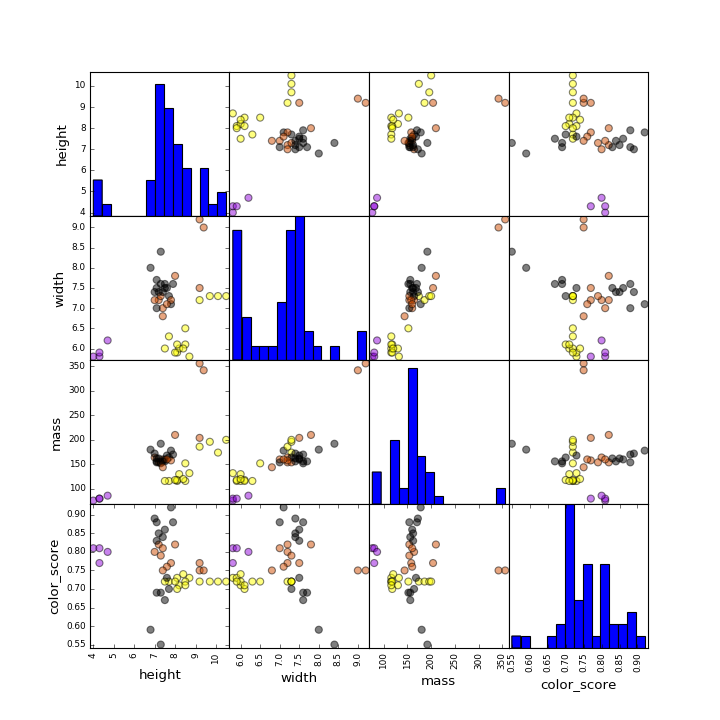

In [29]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


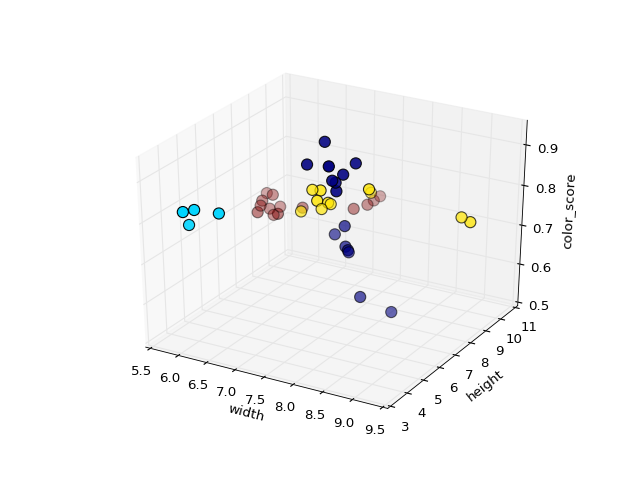

In [30]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [31]:
X_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


In [32]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

### Classification
* k-NN classifiers are an example of what's called instance based or memory based supervised learning. What this means is that instance based learning methods work by memorizing the labeled examples that they see in the training set. And then they use those memorized examples to classify new objects later.
* The k in k-NN refers to the number of nearest neighbors the classifier will retrieve and use in order to make its prediction. 
#### The k-Nearest Neighbor (k-NN) classifier algorithm
* FInd the most similar instances to X_test that are in X_train
* Get the labels of y_NN for the instances in X_NN
* predict the label by combining the labels y_NN
#### A nearest neighbor algorithm needs four things specified
1. A distance metric
2. How many nearest neighbors to look at?
3. Optional weighting function on the neighbor points
4. Method of aggregating the classes of neighbor points

### Create classifier object

In [39]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

#### Train the classifier (fit the estimator) using the training data¶

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Estimate the accuracy of the classifier on future data, using the test data¶

In [42]:
knn.score(X_test, y_test)

0.53333333333333333

#### Use the trained k-NN classifier model to classify new, previously unseen objects

In [43]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [44]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

#### Plot the decision boundaries of the k-NN classifier

In [45]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

ImportError: No module named 'adspy_shared_utilities'

#### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


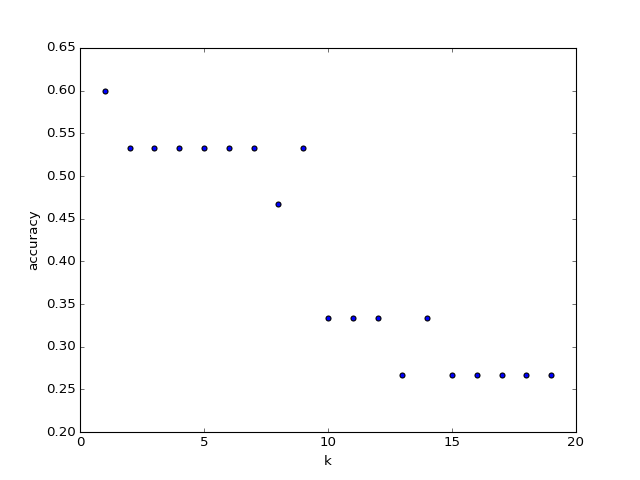

In [46]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


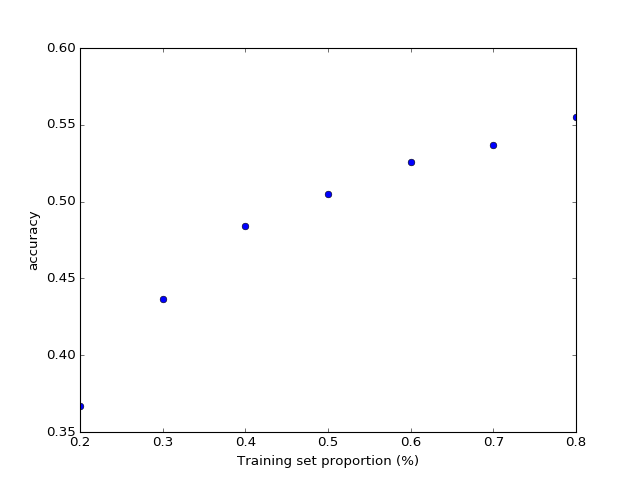

In [47]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');